### Ejercicio 2 - TSA - Búsqueda de la palabra 'Hamburguesa' en Colombia 2004-2021

La siguiente serie de tiempo nos permite observar la popularidad de búsqueda en Google de la palabra "Hamburguesa" en Colombia, estos datos nos muestra el interés que ha tenido este alimento a lo largo del tiempo (2004-2021).

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [175]:
df = pd.read_csv('multiTimeline.csv', sep=',')
df.head()

,Month,Count
0,2004-01,29
1,2004-02,0
2,2004-03,23
3,2004-04,19
4,2004-05,0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   211 non-null    object
 1   Count   211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [177]:
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,Count
Month,
2004-01-01,29
2004-02-01,0
2004-03-01,23
2004-04-01,19
2004-05-01,0


#### 1. ¿Es esta serie de tiempo estacionaria?

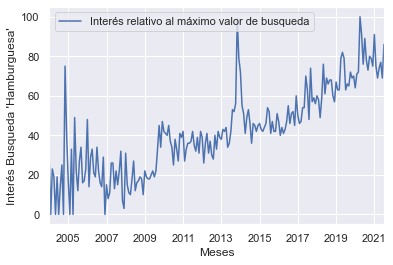

In [178]:
df.plot()
plt.xlabel("Meses")
plt.ylabel("Interés Busqueda 'Hamburguesa'")
plt.legend(['Interés relativo al máximo valor de busqueda'])
plt.show()

El comportamiento de la serie nos muestra visualmente que hay una **tendencia incremental**, sin embargo no es fácil identificar estacionalidad.

Una serie es estacionaria si tiene constantes propiedades estadisticas como la media y la varianza. Separamos la muestra en 4  y 2 partes para verificar si cada uno de los subgrupos tiene el mismo comportamiento (media y varianza cercanas).

In [179]:
df_t = pd.read_csv('multiTimeline.csv', sep=',')
df_1 = df_t.iloc[:12,:]
df_2 = df_t.iloc[13:25,:]
df_3 = df_t.iloc[26:38,:]
df_4 = df_t.iloc[39:51,:]

mean1, mean2, mean3, mean4 = df_1.mean(), df_2.mean(),df_3.mean(), df_3.mean()
var1, var2, var3, var4 = df_1.var(), df_2.var(),df_3.var(), df_3.var()
print('mean1=%f, mean2=%f,mean3=%f, mean4=%f ' % (mean1, mean2, mean4, mean4))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f' % (var1, var2, var3, var4))

mean1=20.333333, mean2=23.416667,mean3=20.000000, mean4=20.000000 
variance1=470.606061, variance2=254.628788, variance3=104.909091, variance4=104.909091


In [180]:
#Evaluación Propiedades Estadisticas en el Tiempo (Media, varianza) - 2 Intervalos
df_1a = df_t.iloc[:25,:]
df_2a = df_t.iloc[26:,:]

mean1a, mean2a = df_1a.mean(), df_2a.mean()
var1a, var2a= df_1a.var(), df_2a.var()
print('mean1=%f, mean2=%f' % (mean1a, mean2a))
print('variance1=%f, variance2=%f' % (var1a, var2a))

mean1=21.680000, mean2=44.929730
variance1=335.726667, variance2=432.500470


Con estos ejercicios (separación de la muestra en 2 y 4 partes) podemos evidenciar que la media y varianza incrementan en cada subgrupo, lo que nos permite sospechar que la serie no es estacionaria.

**Test Dickey Fuller** 
Para comprobar estacionaridad utilizamos la prueba estadistica de Dickey Fuller. Para esta prueba tenemos que:

H0:La serie de tiempo no es estacionaria (es dependiente del tiempo)

H1:La serie del tiempo es estacionaria

In [181]:
from statsmodels.tsa.stattools import adfuller

In [182]:
X=df.Count
result =adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.966292
p-value: 0.765359
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


p-value > 0.05, por tanto no se puede rechazar H0 y concluimos que la serie de tiempo **no es estacionaria**.

#### 2. Construir y gráficar el Componente de Tendencia de la Serie de Tiempo

Para construir y gráficar el componente de tendencia, utilizamos la media movil con 20 meses. Con este gráfico confirmamos que hay una tendencia incremental que indica que la búsqueda de 'Hamburguesa' ha aumentado con el tiempo en Colombia.

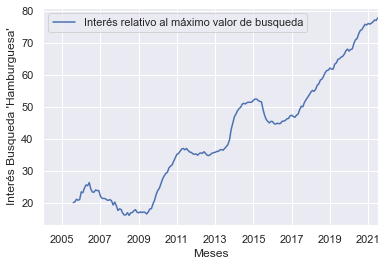

In [183]:
df.rolling(20).mean().plot()
plt.xlabel("Meses")
plt.ylabel("Interés Busqueda 'Hamburguesa'")
plt.legend(['Interés relativo al máximo valor de busqueda'])
plt.show()

#### 3. Construir y gráficar el Componente Estacional de la Serie de Tiempo

Para construir y graficar el componente estacional hay 2 métodos, restar el componente de tendencia a la serie de datos, o diferenciar la serie de datos. Utilizamos el segundo método donde ahora gráficamente podemos evidenciar que no se tiene el componente de tendencia. Adicionalmente hay algunos picos en algunos puntos del tiempo, que aunque no tienen un patrón, resultan de interés.

In [184]:
diff = df.diff()
diff.head()

,Count
Month,
2004-01-01,NaN
2004-02-01,-29.0
2004-03-01,23.0
2004-04-01,-4.0
2004-05-01,-19.0


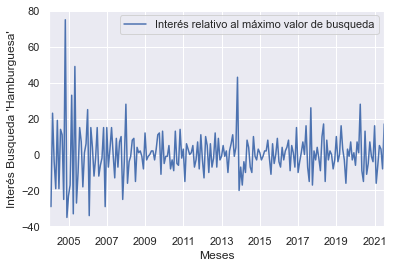

In [185]:
diff.plot()
plt.xlabel("Meses")
plt.ylabel("Interés Busqueda 'Hamburguesa'")
plt.legend(['Interés relativo al máximo valor de busqueda'])
plt.show()

#### 4. ¿Es la serie sin tendencia (del punto anterior) estacionaria?

Nuevamente, utilizamos el test de Dickey Fuller para pobrar estadisticamente si la serie de tiempo es estacionaria.

H0:La serie de tiempo no es estacionaria (es dependiente del tiempo)

H1:La serie del tiempo es estacionaria

In [186]:
Y=diff.Count
result_diff =adfuller((Y).iloc[1:])
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.229196
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


Con p-value < 0.05, rechazamos la hipotesis nula. Por tanto, concluimos que la serie (sin su tendencia), **es estacionaria**.

#### 5. Construya un gráfico para analizar la autocorrelación.

Una serie es periodica si tiene repeticiones en intervalos de mismo tamaño. En otras palabras, que la serie tiene una correlación consigo misma (autocorrelación) por ese intervalo.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

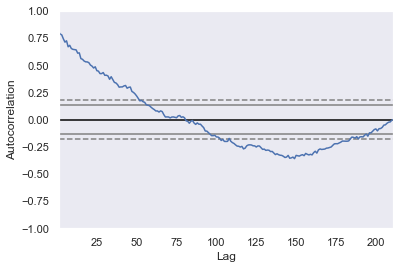

In [187]:
plt.figure()
pd.plotting.autocorrelation_plot(df)

En este gráfico podemos observar la correlación de las observaciones de la serie consigo misma en un rango de rezagos (aquellos que salen de las lineas punteadas). Se evidencia que los valores fuera del intervalo de confianza presentan alta correlación. Sin embargo, gráficamente no se percibe con facilidad la periodicidad (o su periodo).

**A partir de la exploración de los datos de búsqueda de la palabra 'hamburguesa' en el tiempo (Colombia, 2004-2021), podemos conluir que la serie de tiempo tiene una tendencia incremental, por tanto no es estacionaria. Sin embargo, cuando se retira el componente el tendencia, la serie de tiempo es estacionaria con un (1) rezago. Adicionalmente, probamos que la serie tiene alta autocorrelación en algunos regazos de tiempo (periodicidad)**